# PISA 2012 Data Exploration
## by Alicia Bosch

## Investigation Overview

The main goals of this investigation is to answer the following questions:

- Does gender influence the resulting scores? Are there gender gaps?
- How does the parental level of education, class size and homework time influence on student's performance?
- How much do the different scores vary depending on the country?


## Dataset Overview

This notebook will explore the PISA 2012 dataset. This dataset collects a a survey of students' skills and knowledge as they approach the end of compulsory education. It is not a conventional school test. Rather than examining how well students have learned the school curriculum, it looks at how well prepared they are for life beyond school.

This dataset will look at a sample of 485490 students and 16 attributes. To properly understand the average scores, we will study  features such as gender, parental level of education, class size, homework time and country. However, in order to avoid a lengthy presentation, question 1 and 3 will be answered but, for question 2, the only feature that will be mentioned will the homework one. 

In [2]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [3]:
# load in the dataset into a pandas dataframe
df = pd.read_csv('pisa_df_clean.csv')

In [7]:
#names of my variables of interest
#CATEGORICAL
gender= 'Gender'
homework = 'Homework time (h/wk)'
country = 'Country'
motherbachelor = 'Mother holding a Bachelor'
fatherbachelor = 'Father holding a Bachelor'
mother_hs = 'Mother highest schooling'
father_hs = 'Father highest schooling'

#NUMERICAL
math = 'Average Math Score'
science = 'Average Science Score'
reading = 'Average Reading Score'
total = 'Average Total Score'
class_size = 'Class_size'

#clustering
scores = [math, science, reading, total]
num_vars = [math, science, reading, total, homework, class_size] 
cat_vars = [gender, country, motherbachelor, fatherbachelor, mother_hs, father_hs]

### How does Gender influence on the results? Are there any gender gaps?

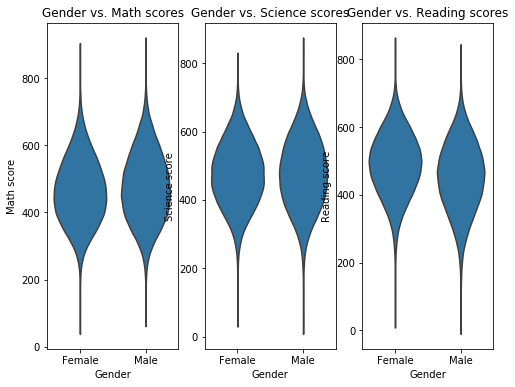

In [8]:
#Violin plot: gender vs. math scores
plt.figure(figsize = [8,6])

plt.subplot(1,3,1)
base_color = sb.color_palette()[0]
sb.violinplot(data = df, x = gender, y = math, color = base_color,
              inner = None);
plt.title('Gender vs. Math scores');
plt.xlabel('Gender');
plt.ylabel('Math score');

#Violin plot: gender vs. math scores
plt.subplot(1,3,2)
base_color = sb.color_palette()[0]
sb.violinplot(data = df, x = gender, y = science, color = base_color,
              inner = None);
plt.title('Gender vs. Science scores');
plt.xlabel('Gender');
plt.ylabel('Science score');

#Violin plot: gender vs. reading scores
plt.subplot(1,3,3)
base_color = sb.color_palette()[0]
sb.violinplot(data = df, x = gender, y = reading, color = base_color,
              inner = None);
plt.title('Gender vs. Reading scores');
plt.xlabel('Gender');
plt.ylabel('Reading score');

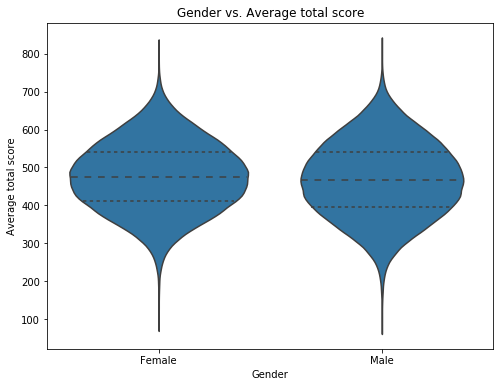

In [9]:
#total average
plt.figure(figsize = [8,6])
base_color = sb.color_palette()[0]
sb.violinplot(data = df, x = gender, y = total, color = base_color,
              inner='quartile');
plt.title('Gender vs. Average total score');
plt.xlabel('Gender');
plt.ylabel('Average total score');

Males get better grades in Science and Maths whereas women overpass them in Reading. However, in average, males and females get similar scores. This is so because there is such a striking difference with men and women in the scores they get in Reading, that the final average score balances.  

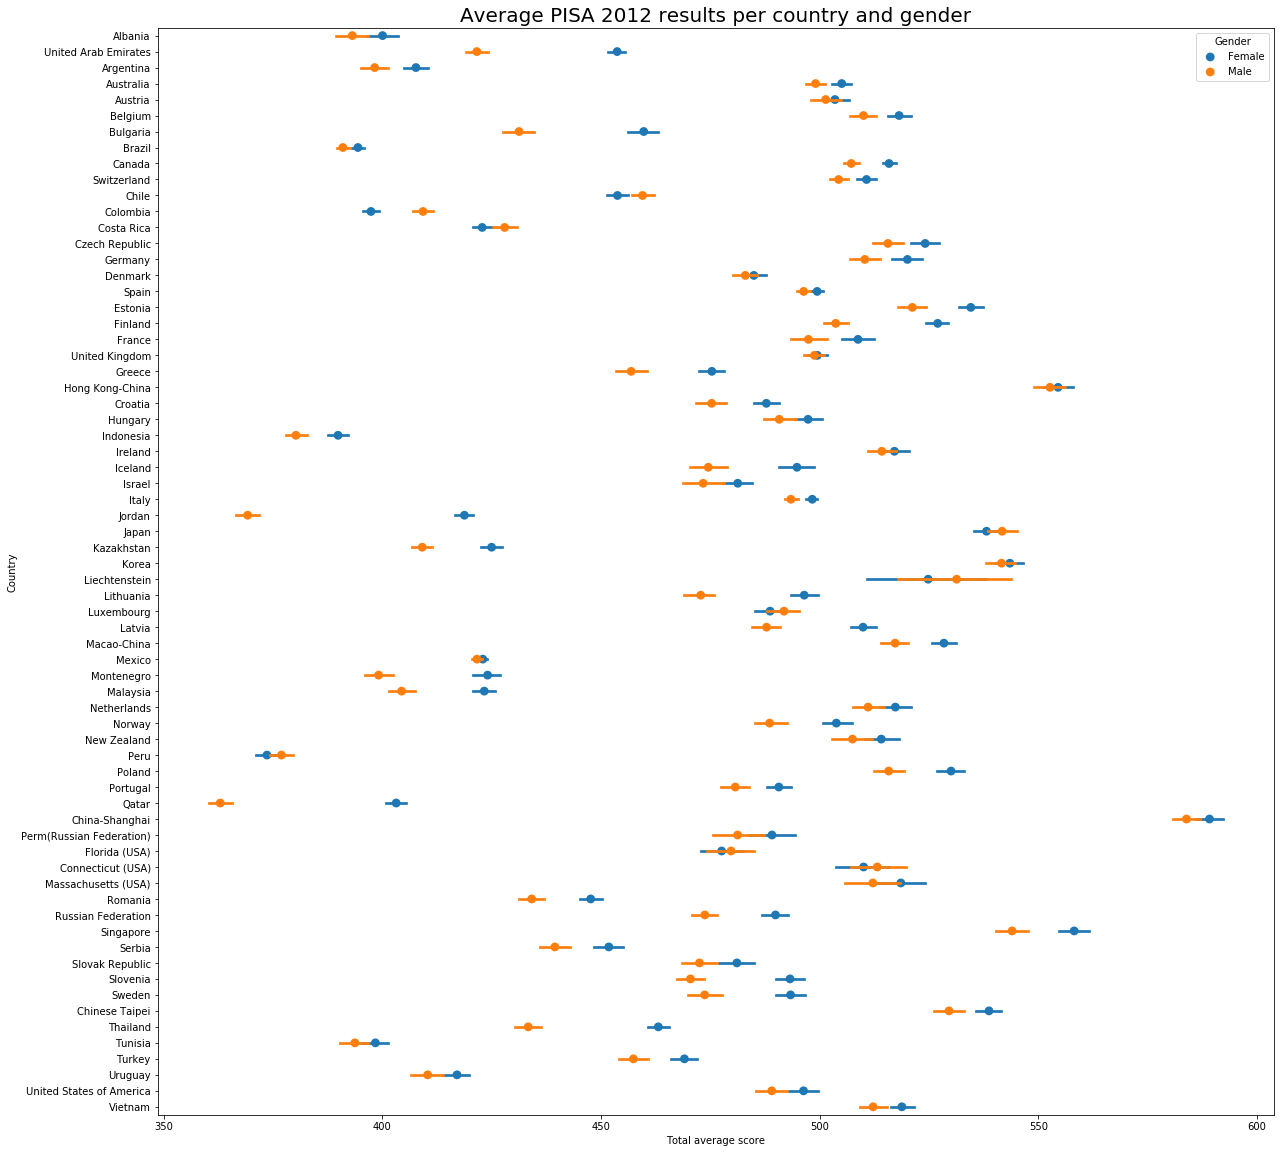

In [12]:
#PISA results per country and gender
plt.figure(figsize = [20, 20])
ax = sb.pointplot(data = df, y = country, x = total, hue = gender, linestyles = "")
plt.xlabel('Total average score');
plt.ylabel('Country');
plt.title('Average PISA 2012 results per country and gender', size = 20);

On total average score, the gender gap is sligthly better for women. 
Women tend to get slightly better total average scores in most countries.

Also, gender gap is bigger in low performing countries than in high performing countries, where there is hardly any gap. 

### Homework influence on the results

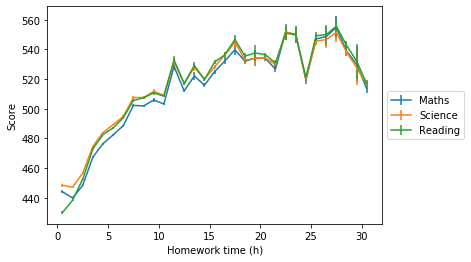

In [11]:
#Influence of time spent studying out of school to scores
bin_size = 1
xbin_edges = np.arange(0, df[math].max()+bin_size, bin_size)
xbin_centers = (xbin_edges + bin_size/2)[:-1]

# MATH
# compute statistics in each bin
data_xbins = pd.cut(df[homework], xbin_edges, right = False, include_lowest = True)
y_means = df[math].groupby(data_xbins).mean()
y_sems = df[math].groupby(data_xbins).sem()

# plot the summarized data
plt.errorbar(x = xbin_centers, y = y_means, yerr = y_sems)
plt.xlabel('Homework time (h)')
plt.ylabel('Score')

#SCIENCE
#compute statistics in each bin
data_xbins = pd.cut(df[homework], xbin_edges, right = False, include_lowest = True)
y_means = df[science].groupby(data_xbins).mean()
y_sems = df[science].groupby(data_xbins).sem()

# plot the summarized data
plt.errorbar(x = xbin_centers, y = y_means, yerr = y_sems)
plt.xlabel('Homework time (h)')
plt.ylabel('Score')

#READING
#compute statistics in each bin
data_xbins = pd.cut(df[homework], xbin_edges, right = False, include_lowest = True)
y_means = df[reading].groupby(data_xbins).mean()
y_sems = df[reading].groupby(data_xbins).sem()

# plot the summarized data
plt.errorbar(x = xbin_centers, y = y_means, yerr = y_sems)
plt.xlabel('Homework time (h)')
plt.ylabel('Score')

plt.legend(['Maths', 'Science', 'Reading'], bbox_to_anchor = (1, 0.5), loc = 6)
plt.show()

Time spent studying out of school is important but only to a point. Students benefit from more work outside the classroom. However, the benefits show a plateau effect as the time spent studying increases. This pattern is consistent across Math, Reading and Science scores.

### Average PISA results per country

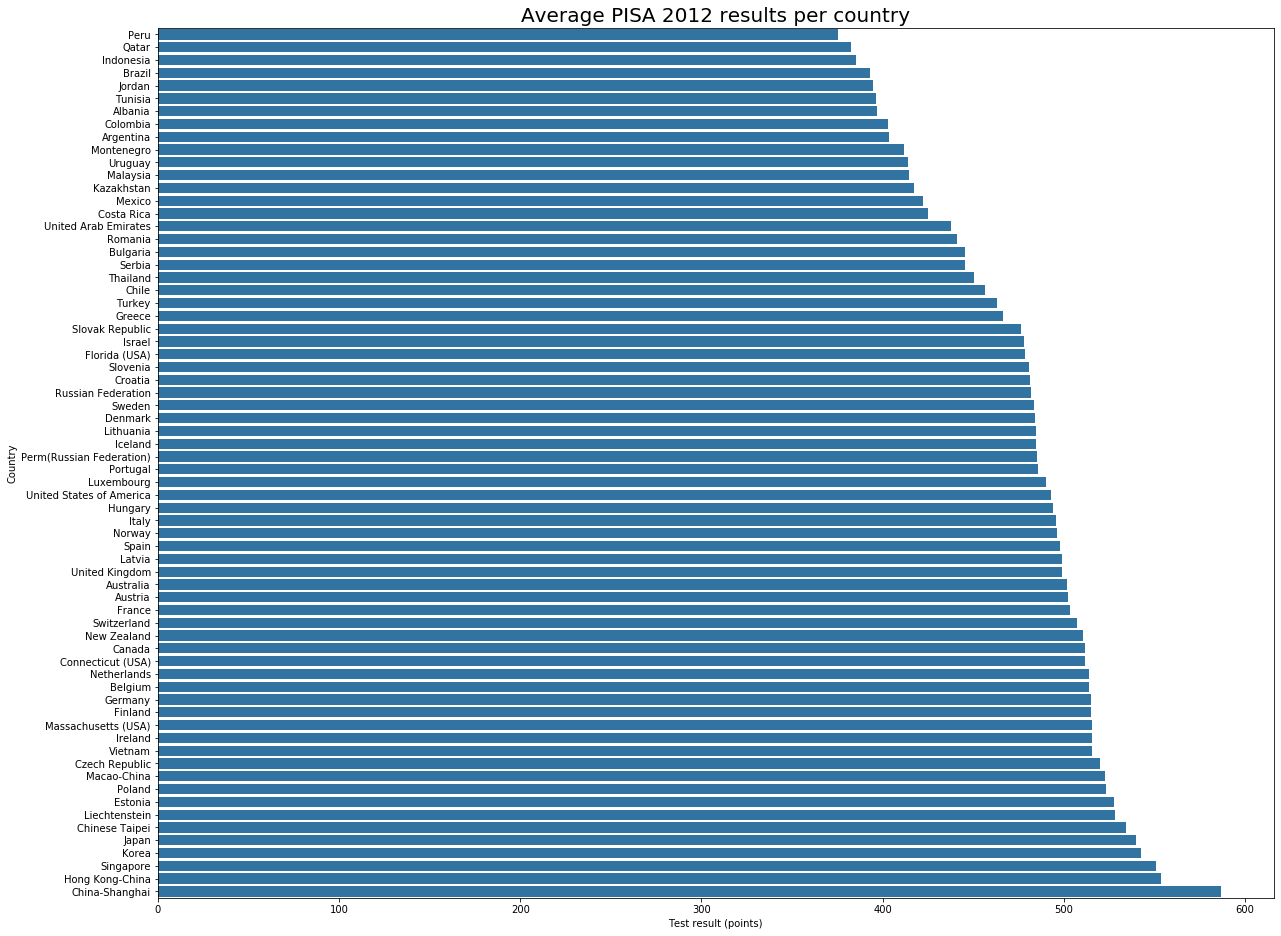

In [5]:
#Average PISA results per country
ave_cnt = df.groupby('Country')['Average Total Score'].mean()
ave_cnt.sort_values()
plt.figure(figsize = [20,16])
base_color = sb.color_palette()[0]
in_order = ave_cnt.sort_values().index
sb.barplot(ave_cnt.sort_values().values, in_order, color = base_color)
plt.xlabel('Test result (points)');
plt.ylabel('Country');
plt.title('Average PISA 2012 results per country', size=20);

Regarding the countries and its scores average, you can clearly see how the top performing countries are China, Singapore, Korea and Japan. The countries that underperform the most are Peru, Qatar, Indonesia and Brazil. China almost arrives to the 600 maximum score, whereas Peru is around the 380 score.

> Once you're ready to finish your presentation, check your output by using
nbconvert to export the notebook and set up a server for the slides. From the
terminal or command line, use the following expression:
> > `jupyter nbconvert <file_name>.ipynb --to slides --post serve --template output_toggle`

> This should open a tab in your web browser where you can scroll through your
presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent
slide. Make sure you remove all of the quote-formatted guide notes like this one
before you finish your presentation!

In [ ]:
!jupyter nbconvert "pisa_slides.ipynb" --to slides --post serve --template output_toggle